### Retail Industry: Big Sales Mart

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and find out the sales of each product at a particular store.** Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [1]:
# import the customary libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importing the data
sales = pd.read_csv("~/Downloads/train_v9rqX0R.csv")

In [5]:
# preview the data
sales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


#### Observations

* Item Outlet Sales is the target variable. It means that the company is interested in finding the sales.
* The rest of the variables are predictor variables.
* Predictor Variables are those vars that help predict the target.


#### Process of EDA

* Univariate Analysis:: One Var Analysis(Num)::Histogram, Distplot, Boxplot. In case of Cat Var: Countplot(Frequency Plot)

* Bivariate Analysis:: Pred vs Tgt

    1.1. Num vs Num (tgt) => Scatterplot
    1.2. Cat vs Num (tgt) => **Boxplot**, Violinplot, Swarmplots, Barplots etc.
    1.3. Cat vs Cat (tgt) => pd.crosstab (Cross Table) =>Countplot
    
* Missing Values
* Outlier Identification and Removal
* **Feature Engineering**
* Standardization or Normalization of the Data
* **Categorical Data: Encoding**
* Transformation
This scaling and transformation stage is called Data Preprocessing Stage.

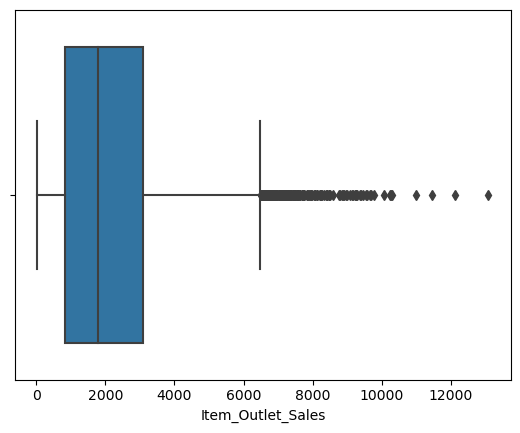

In [6]:
# Univariate Analysis:: Tgt
sns.boxplot(sales.Item_Outlet_Sales)
plt.show()

# One can use Boxplot to see the Outliers in the Data...

In [7]:
# Summary Statistics of the Data
sales.Item_Outlet_Sales.describe() # 958

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

#### Skewness

* It simply represents that the data is not Normal.
* For a Positively Skewed data:: Mean > Median > Mode
* For a Negatively Skewed Data:: Mean < Median < Mode
* For a Symmetrically Distributed Data:: Mean = Median = Mode

* If the Skewness is between -0.5 to 0.5:: Data is Presumed to be Normal
* 0.5 to 1: Moderately Skewed
* Greater than 1: Highly Skewed.

In [8]:
sales.Item_Outlet_Sales.skew()

1.1775306028542796

In [9]:
sales.info() # information on the Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
# Find the List of Numerical Columns
sales.select_dtypes(include = np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

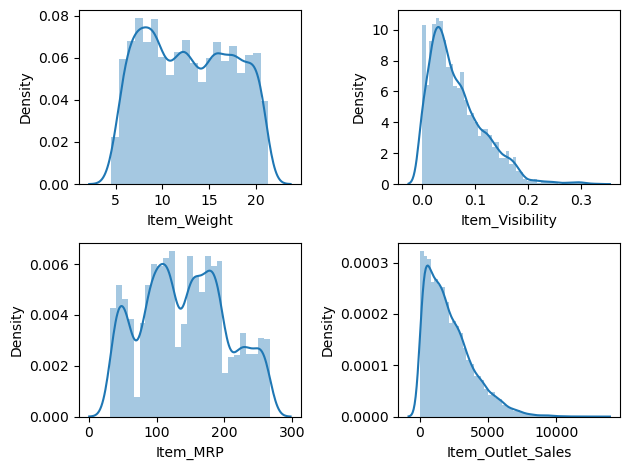

In [11]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
 'Item_Outlet_Sales']
#len(num_cols)
nrows = 2
ncols = 2
iterator = 1

for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(sales.loc[:, i])
    iterator+=1 # print all the plots
    
plt.tight_layout()
plt.show()

### Categorical Data

In [12]:
sales.select_dtypes(include = "object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

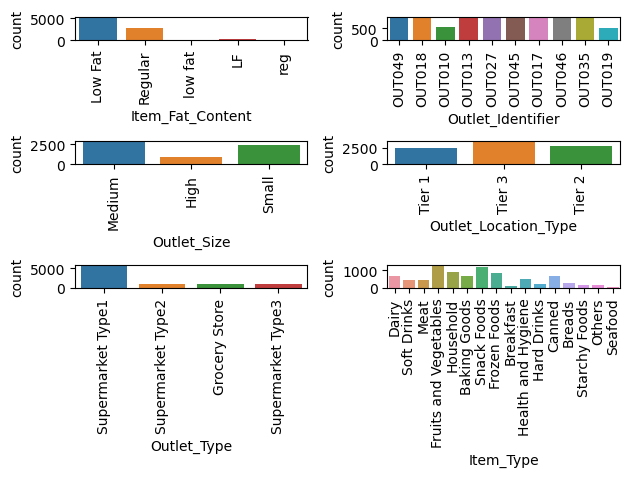

In [13]:
cat_cols = ['Item_Fat_Content', 'Outlet_Identifier',
       'Outlet_Size', 
            'Outlet_Location_Type', 'Outlet_Type', 'Item_Type']
nrows = 3
ncols = 2
repeater = 1

for i in cat_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.countplot(sales.loc[:, i])
    plt.xticks(rotation = 90)
    repeater = repeater+1
plt.tight_layout()
plt.show()

<AxesSubplot:>

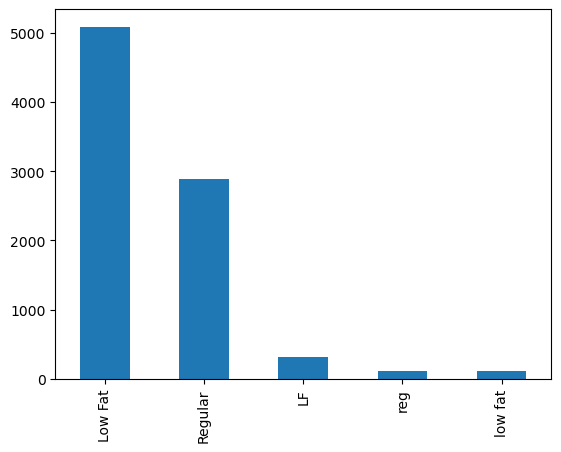

In [14]:
sales.Item_Fat_Content.value_counts().plot(kind = "bar")

In [15]:
# Fixing the Item Fat Content
sales.Item_Fat_Content.replace(to_replace = ["LF", "low fat", "reg"],
                              value = ["Low Fat", "Low Fat", "Regular"],
                              inplace  =True)

In [16]:
# Check the High Freq Outlet
sales.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [17]:
sales.loc[sales.Outlet_Identifier=="OUT027", 
          "Item_Outlet_Sales"].describe()

count      935.000000
mean      3694.038558
std       2127.760054
min        241.685400
25%       2044.338900
50%       3364.953200
75%       4975.523400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

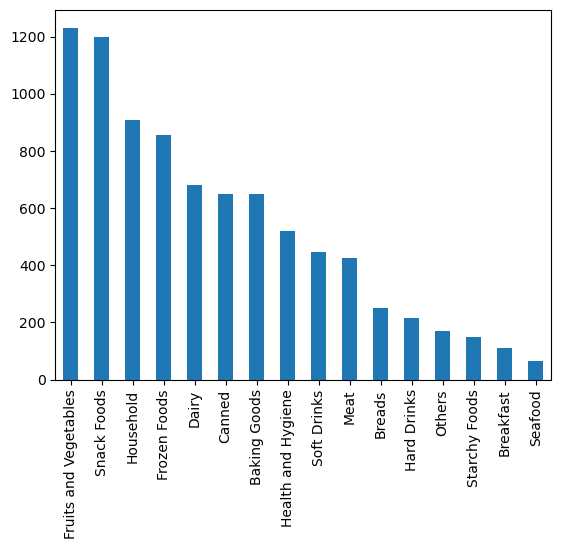

In [18]:
# Item Type
sales.Item_Type.value_counts().plot(kind = "bar")

# Top 5: Fruits and Veggies, Dairy, Household Frozen & Snacks..

#### Observations

* Average Sales comes out to be 2100 Dollars
* Most Selling Products are Fruits and Veggies, Dairy, Household Frozen & Snacks.
* Most Visible Outlet in the Business is OUT027
* Most of the Outlets are based in **Tier3** Cities and are **Medium** Sized Outlets.
* Most of the Items Selling in Business are **Low Fat** items
* We also observed that Item Visibility is highly skewed and has lots of 0s.


### Bivariate Analysis - num vs tgt

In [19]:
num_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

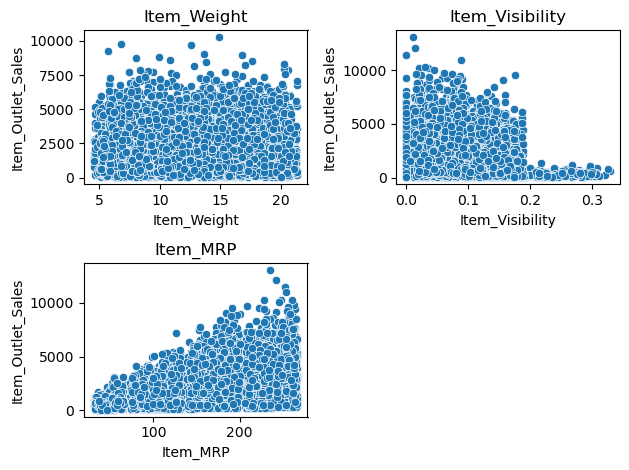

In [20]:
nrows = 2
ncols = 2
iterator = 1

for i in num_cols[:-1]:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(sales.loc[:, i], sales.Item_Outlet_Sales)
    iterator = iterator+1
    plt.title(i)
    
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

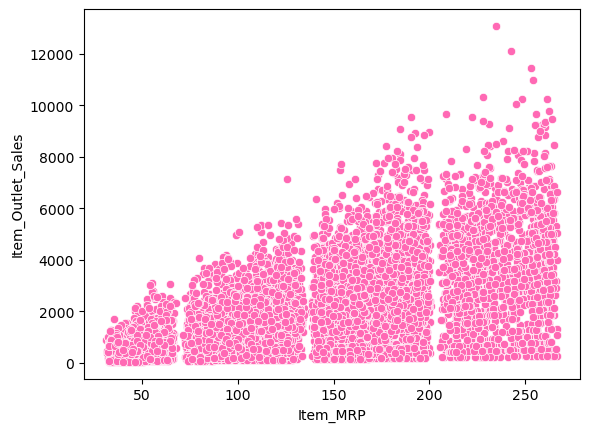

In [21]:
sns.scatterplot(sales.Item_MRP, sales.Item_Outlet_Sales,
               color = "hotpink")

### Relationship between Numerical Vars

In [22]:
# Item Weight vs Sales
sales.loc[:, ["Item_Visibility", "Item_Outlet_Sales"]].cov()

,Item_Visibility,Item_Outlet_Sales
Item_Visibility,0.002662,-1.132561e+01
Item_Outlet_Sales,-11.325611,2.912141e+06


<AxesSubplot:>

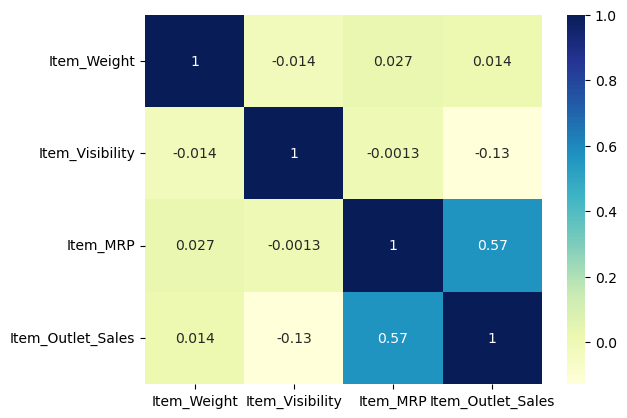

In [23]:
# Correlation for the whole data...
sns.heatmap(sales.loc[:, num_cols].corr(), annot = True, 
            cmap ="YlGnBu")

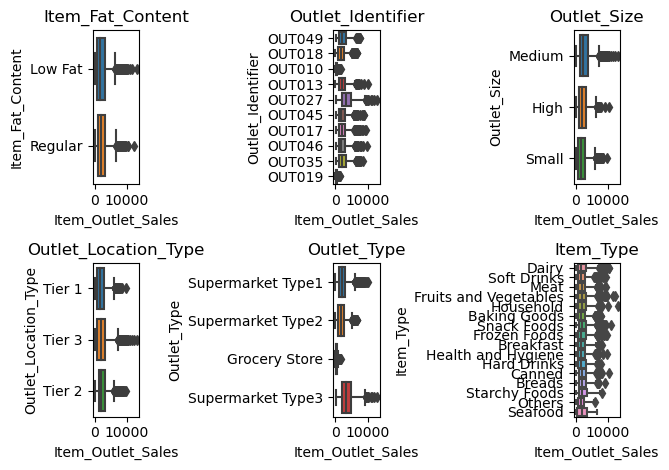

In [24]:
# Cat vs Number::Boxplot
nrows = 2
ncols = 3
rep = 1
for i in cat_cols:
    plt.subplot(nrows, ncols, rep)
    sns.boxplot(y = sales.loc[:, i], x = sales.Item_Outlet_Sales)
    plt.title(i)
    rep+=1
    
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

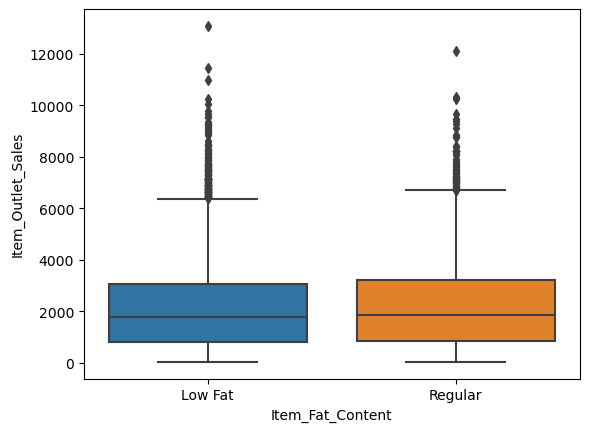

In [25]:
sns.boxplot(sales.Item_Fat_Content, sales.Item_Outlet_Sales)

# Low Fat Content has higher sales than the Regular Content

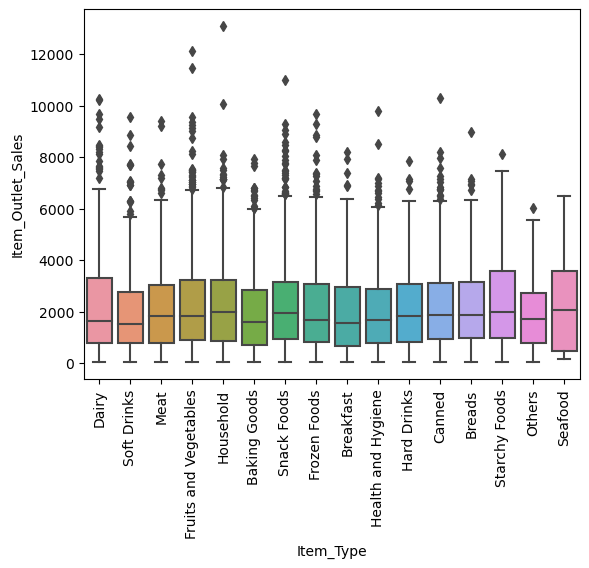

In [26]:
sns.boxplot(sales.Item_Type, sales.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.show()

# Low Fat Content has higher sales than the Regular Content

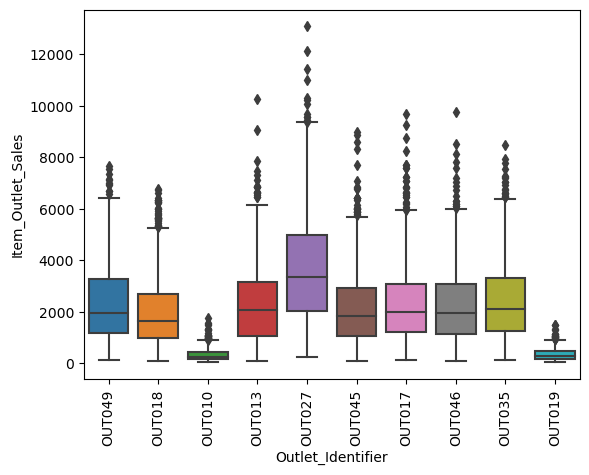

In [27]:
sns.boxplot(sales.Outlet_Identifier, sales.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.show()

# Worst Performing Outlets are Out10 and Out19

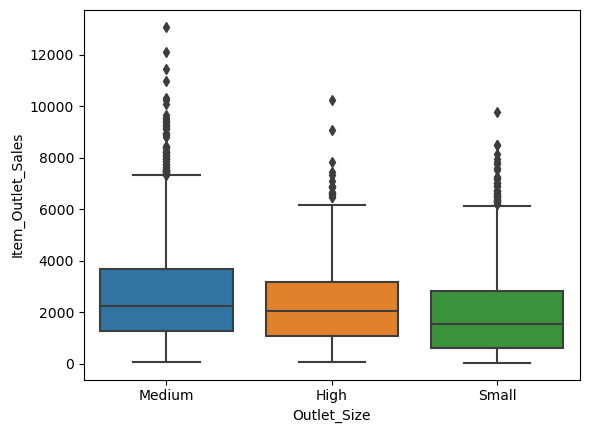

In [28]:
sns.boxplot(sales.Outlet_Size, sales.Item_Outlet_Sales)
#plt.xticks(rotation = 90)
plt.show()

# Medium Outlets have the Highest Sales followed by High Spaced

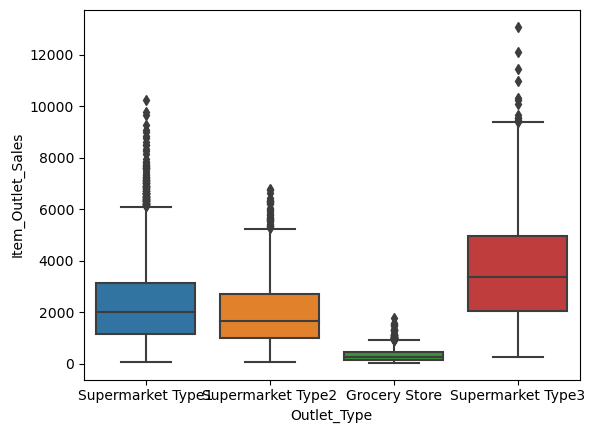

In [29]:
sns.boxplot(sales.Outlet_Type, sales.Item_Outlet_Sales)
#plt.xticks(rotation = 90)
plt.show()

# S3 and S1 command the highest Sales in the business...

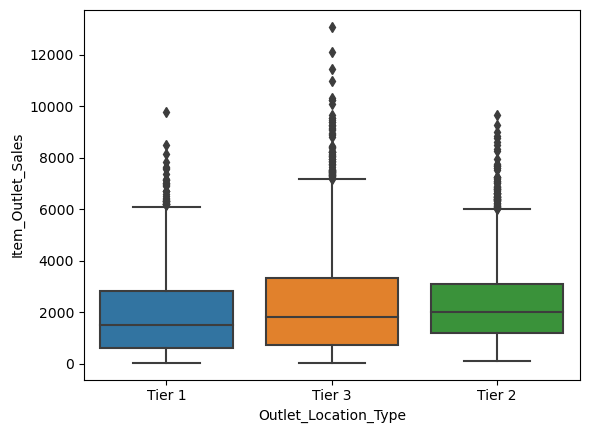

In [30]:
sns.boxplot(sales.Outlet_Location_Type, sales.Item_Outlet_Sales)
#plt.xticks(rotation = 90)
plt.show()

# Tier 3 commands the highest Sales in the business...

In [31]:
# Missing Values
sales.isnull().sum() # np.NaN 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Missing Values

In [32]:
sales.loc[sales.Item_Weight.isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [33]:
# Pattern using Item Fat Content...
sales.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [34]:
# Find the Mean Weight where the Item Fat Content is Low Fat

sales.loc[sales.Item_Fat_Content=="Low Fat" , "Item_Weight"].median()

12.65

In [35]:
sales.loc[sales.Item_Fat_Content=="Regular" , "Item_Weight"]

1        5.920
3       19.200
5       10.395
6       13.650
8       16.200
         ...  
8513    12.000
8514    15.000
8517    20.750
8519     8.380
8521     7.210
Name: Item_Weight, Length: 3006, dtype: float64

In [36]:
# Item Weight basis Item Type
sales.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [37]:
# Groupby
sales.groupby("Item_Type")["Item_Weight"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,536.0,12.277108,4.773622,4.880,8.23500,11.650,15.75,20.85
Breads,204.0,11.346936,4.440540,4.635,7.12875,10.600,14.85,20.85
Breakfast,89.0,12.768202,5.038131,6.425,8.06000,10.695,17.25,21.10
Canned,539.0,12.305705,4.586564,4.615,8.11500,12.150,16.25,21.35
Dairy,566.0,13.426069,4.686532,4.805,9.27750,13.350,17.60,20.70
Frozen Foods,718.0,12.867061,4.507383,4.555,8.93500,12.850,17.00,20.85
Fruits and Vegetables,1019.0,13.224769,4.575275,5.460,9.19500,13.100,17.10,21.35
Hard Drinks,183.0,11.400328,4.239144,4.610,8.26000,10.100,14.85,19.70
Health and Hygiene,430.0,13.142314,4.512313,5.175,9.69500,12.150,17.60,21.25


In [38]:
# Item ID
sales.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [39]:
sales.loc[sales.Item_Identifier=="DRG01", "Item_Weight"]

544     14.8
1218    14.8
3005     NaN
5974     NaN
8522    14.8
Name: Item_Weight, dtype: float64

In [40]:
sales.loc[sales.Item_Type=="Dairy", "Item_Weight"]

0        9.300
11      18.500
19      13.350
28       5.925
30      19.250
         ...  
8424     7.405
8447    20.350
8448    14.300
8457     5.800
8512    20.700
Name: Item_Weight, Length: 682, dtype: float64

In [41]:
# We will deal with Missing Values basis the Item Identifier...

sales["Item_Weight"] = sales.groupby("Item_Identifier")["Item_Weight"].apply(lambda x:x.fillna(x.median()))

In [42]:
sales.loc[sales.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [43]:
sales.loc[sales.Item_Type=="Dairy", 
          "Item_Weight"].median()

13.35

In [44]:
sales.loc[927, "Item_Weight"] = 12.85
sales.loc[1922, "Item_Weight"] = 13.15
sales.loc[4187, "Item_Weight"] = 13.35

In [45]:
sales.isnull().sum()[sales.isnull().sum()!=0]

Item_Weight       1
Outlet_Size    2410
dtype: int64

In [46]:
# Item Visibility
dict_visible = sales.groupby("Item_Identifier")
["Item_Visibility"].median().to_dict()

AttributeError: 'list' object has no attribute 'median'

In [ ]:
sales["Item_Visibility"] = sales.groupby("Item_Identifier")["Item_Visibility"].apply(lambda x:x.replace(0, x.median()))

In [ ]:
# Check if 0s are dealt with
sns.scatterplot(sales.Item_Visibility, sales.Item_Outlet_Sales)

### Outlet Size

In [ ]:
sales.loc[sales.Outlet_Size.isnull()].head()

In [ ]:
sales.groupby(["Outlet_Location_Type", "Outlet_Type"])["Outlet_Size"].value_counts()

In [ ]:
# Grocery Store and Tier 3
sales.loc[(sales.Outlet_Location_Type=="Tier 3") & 
          (sales.Outlet_Type=="Grocery Store") & 
          (sales.Outlet_Size.isnull()), "Outlet_Size"]="Small" 

In [ ]:
sales.loc[(sales.Outlet_Location_Type=="Tier 2") & 
          (sales.Outlet_Type=="Supermarket Type1") & 
          (sales.Outlet_Size.isnull()), "Outlet_Size"]="Small"

In [ ]:
sales.isnull().sum()

### Outlier Identification

In [ ]:
sales.describe()

In [ ]:
# print the summary statistic of the Data ~ target variable
print("Mean: ", sales.Item_Outlet_Sales.mean())
print("Median: ", sales.Item_Outlet_Sales.median())
print("Mode: ", sales.Item_Outlet_Sales.mode())

In [ ]:
# Print the Quartiles...
print("Q1: ", sales.Item_Outlet_Sales.quantile(0.25))
print("Q2: ", sales.Item_Outlet_Sales.quantile(0.50))
print("Q3: ", sales.Item_Outlet_Sales.quantile(0.75))

In [ ]:
sales.quantile(0.25)

In [ ]:
# Coefficient of Variation

import scipy.stats as stats # Statistical Library

In [ ]:
stats.variation(sales.select_dtypes(include = np.number))

In [ ]:
def cov(x):
    mean_x = np.mean(x)
    std_x = np.std(x)
    return(std_x/mean_x)

In [ ]:
cov(sales.select_dtypes(include = np.number))

In [ ]:
q1 = sales.quantile(0.25)
q2 = sales.quantile(0.50)
q3 = sales.quantile(0.75)

iqr = q3 -q1
upper_lim = q3 +1.5*iqr
lower_lim = q1 -1.5*iqr

In [ ]:
upper_lim

In [ ]:
sales.loc[~(sales>upper_lim).any(axis = 1)].shape

In [ ]:
# Condition for Removal of Outlier
wt_outliers = sales.loc[~(sales>upper_lim).any(axis = 1)]

In [ ]:
sns.boxplot(wt_outliers.Item_Outlet_Sales)

In [ ]:
sales.max()

In [47]:
wt_outliers.max()

NameError: name 'wt_outliers' is not defined

In [48]:
# Check the Outliers for Item Outlet Sales only...
q1 = sales.Item_Outlet_Sales.quantile(0.25)
q3 = sales.Item_Outlet_Sales.quantile(0.75)
iqr = q3 - q1

upper_lim = q3+1.5*iqr

In [49]:
sales.loc[sales.Item_Outlet_Sales>upper_lim].shape

(186, 12)

In [50]:
lower_lim

NameError: name 'lower_lim' is not defined

In [ ]:
sales.Item_Outlet_Sales.skew()

In [ ]:
wt_outliers.Item_Outlet_Sales.skew()

### Summary

* Univariate Analysis
* Bivariate Analysis
* Missing Values - We will try to look into the patterns that are closely associated with the column that has missing values. Thats the best way to impute the missing values if any. If we are not able to find any patterm then we impute mean/median for num var and mode for categorical var.
* Outliers - Outliers are not range bound numbers. They are generally large numbers and they show on Scatterplot very distinctly. A Numerical rule to identify the Outliers is any number greater than Q3+1.5 * IQR or any number less than q1 - 1.5 * IQR.

### Feature Engineering

* Item ID

In [ ]:
sales.head()

In [ ]:
# Extracting First Two Letters of Item ID
ids =[]
for i in sales.Item_Identifier:
    ids.append(i[:2])

In [ ]:
sales["Item_ID_Cat"] = pd.Series(ids)

In [ ]:
# Boxplot of Item ID Cat vs Sales
sns.boxplot(x = "Item_ID_Cat", 
            y = "Item_Outlet_Sales", data = sales)
plt.show()

In [ ]:
sales.head()

In [ ]:
# Where the Id Cat is NC => Item Fat Content => Non Edible
sales.loc[sales.Item_ID_Cat=="NC", 
          "Item_Fat_Content"] = "Non Edible"

In [ ]:
sales.Item_Fat_Content.value_counts()

In [ ]:
sns.boxplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales",
           data = sales)

In [ ]:
sales.Item_Type.unique()

In [ ]:
perishables = ['Dairy', 'Meat', "Fruits and Vegetables", 
              "Breakfast","Breads", "Starchy Foods", "Seafood"]

In [ ]:
def barbaad(x):
    if x in perishables:
        return("Perishable")
    else:
        return("Non Perishable")

In [51]:
sales["Prod_Cat"] = sales.Item_Type.apply(barbaad)

NameError: name 'barbaad' is not defined

In [52]:
sns.boxplot(x = "Prod_Cat", y = "Item_Outlet_Sales",
           data = sales)

ValueError: Could not interpret input 'Prod_Cat'

In [ ]:
sales.head()

In [53]:
# Price per Unit
sales["Price_Per_Unit"] = sales.Item_MRP/sales.Item_Weight

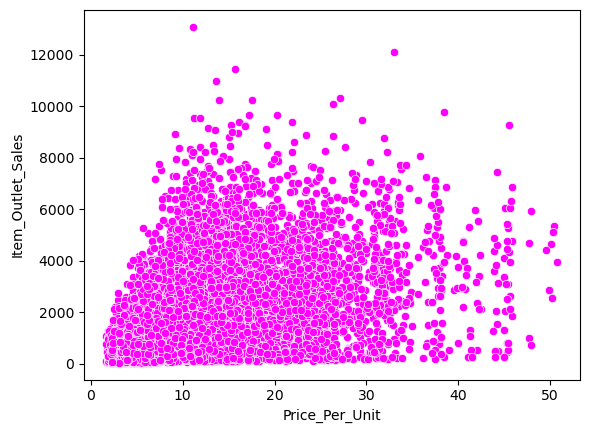

In [54]:
sns.scatterplot(x = "Price_Per_Unit", y = "Item_Outlet_Sales",
               data = sales, color = "magenta")
plt.show()

In [55]:
# Outlet ID
sales.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean()

# 27, 35, 49

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

In [56]:
best = ["OUT027", "OUT035", "OUT049"]
worst = ["OUT019", "OUT010"]
def outlets(x):
    if x in best:
        return("Best")
    elif x in worst:
        return("Poor")
    else:
        return("Good")

In [57]:
sales["Outlets"] = sales.Outlet_Identifier.apply(outlets)

<AxesSubplot:xlabel='Outlets', ylabel='Item_Outlet_Sales'>

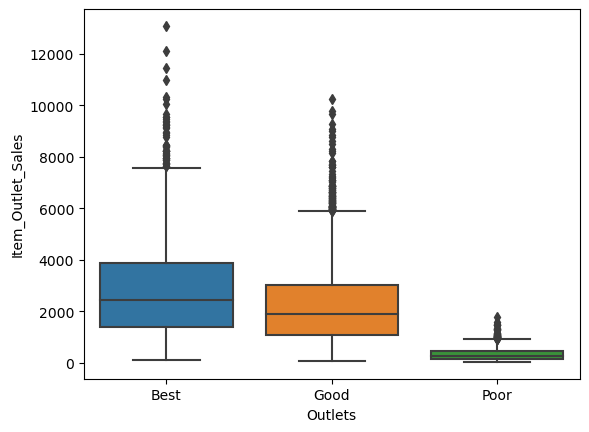

In [58]:
sns.boxplot(x ="Outlets", y = "Item_Outlet_Sales", data = sales)

In [59]:
# 2013 Sales Data
sales["Outlet_Vintage"] = 2013 - sales.Outlet_Establishment_Year

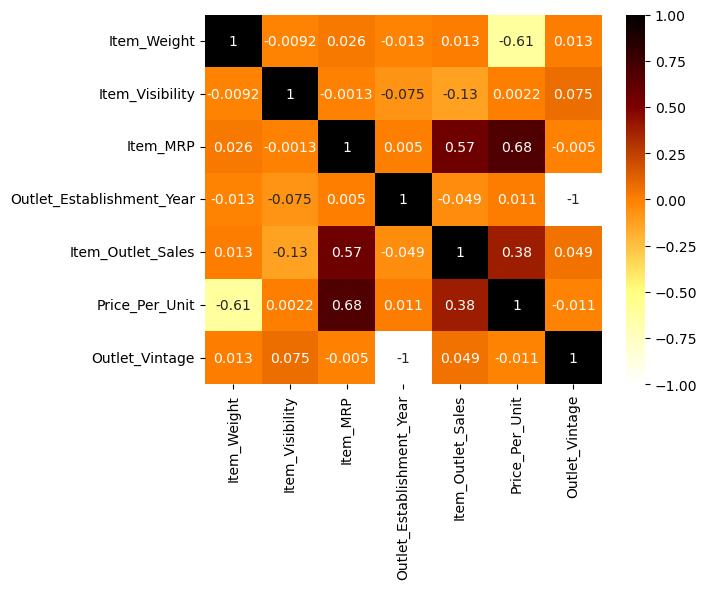

In [60]:
sns.heatmap(sales.corr(), annot = True, cmap = "afmhot_r")
plt.show()

In [61]:
sales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_Per_Unit,Outlets,Outlet_Vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,Best,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,Good,4


### Categorical Variable Treatment:: Encoding

* Categorical Var cannot be kept as it is while building the Model.

* We need to convert the Categories in Number

##### Ways to Convert the String Data into Numbers

* One Hot Encoding - It generates the Identity Matrix of the Categorical Var. It works in such a way that each and every label is defined as 0 and 1 and hence the Machine gives equal weightage to each and every category.

Note: OHE is applicable on Nominal Data. Nominal Data is categorical data with **No Order.**

* Label Encoding: Label Encoding first of all is limited to Target variable Only. However, it is applicable on the **Ordinal variables** in the dataset. Ordinal Variables are those variables that carry certain order. For e.g. No of Bedrooms in House Prices Prediction Problem, Shirt Size (Small, Medium, Large, XL), Ranking Data, Ratings in Amazon etc.Here, one is always greater than the Other.

* Frequency Encoding: Frequency Encoding is a type of encoding where we use the frequencies of the Categories. Here, we take the frequency number generated using value_counts to replace the category with the respective frequency. 

Note: Frequency Encoding is to be used where we witness large number of categories and OHE or Label Encoding is not the appropriate way of dealing with the data.

Note2: Frequency Encoding works well where the target is Numerical and may not be able to give good prediction where the target is Categorical (e.g. Titanc Survival Prediction Problem)

* Target Encoding - 

In [62]:
dict_out = sales.Outlet_Identifier.value_counts().to_dict()

In [63]:
sales["Outlet_Freq"] = sales.Outlet_Identifier.map(dict_out)

In [64]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_Per_Unit,Outlets,Outlet_Vintage,Outlet_Freq
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,Best,14,930
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,Good,4,928
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,Best,14,930
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.484115,Poor,15,555
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,Good,26,932


In [65]:
# Correlation
sales.loc[:, ["Outlet_Freq", "Item_Outlet_Sales"]].corr()

,Outlet_Freq,Item_Outlet_Sales
Outlet_Freq,1.000000,0.415103
Item_Outlet_Sales,0.415103,1.000000


In [66]:
# Item Type - Frequency Encoding
dict_items = sales.Item_Type.value_counts().to_dict()

In [67]:
sales["Item_Type_Freq"] = sales.Item_Type.map(dict_items)

In [68]:
dict_items

{'Fruits and Vegetables': 1232,
 'Snack Foods': 1200,
 'Household': 910,
 'Frozen Foods': 856,
 'Dairy': 682,
 'Canned': 649,
 'Baking Goods': 648,
 'Health and Hygiene': 520,
 'Soft Drinks': 445,
 'Meat': 425,
 'Breads': 251,
 'Hard Drinks': 214,
 'Others': 169,
 'Starchy Foods': 148,
 'Breakfast': 110,
 'Seafood': 64}

In [69]:
# Target encoding involves encoding of Cat basis the TG
tgt_encode = sales.groupby("Outlet_Identifier")['Item_Outlet_Sales'].median().to_dict()

In [70]:
sales["outlet_tgt"] = sales.Outlet_Identifier.map(tgt_encode)

In [71]:
# Correlation
sales.loc[:, ["outlet_tgt", "Item_Outlet_Sales"]].corr()

,outlet_tgt,Item_Outlet_Sales
outlet_tgt,1.000000,0.489391
Item_Outlet_Sales,0.489391,1.000000


In [72]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_Per_Unit,Outlets,Outlet_Vintage,Outlet_Freq,Item_Type_Freq,outlet_tgt
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,Best,14,930,682,1966.1074
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,Good,4,928,445,1655.1788
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,Best,14,930,425,1966.1074
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.484115,Poor,15,555,1232,250.3408
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,Good,26,932,910,2050.6640


In [73]:
# Drop the Unnecessary Columns

newsales = sales.drop(["Item_Identifier", 
                       "Item_Type", "Outlet_Identifier"], axis = 1)

In [74]:
# One Hot Encoding
pd.get_dummies(newsales, drop_first = True).shape

(8523, 20)

In [75]:
# Label Encoding
sales.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [76]:
outlet_s = {"Small":1, "Medium":2, "High":3}

sales.Outlet_Size.map(outlet_s)

0       2.0
1       2.0
2       2.0
3       NaN
4       3.0
       ... 
8518    3.0
8519    NaN
8520    1.0
8521    2.0
8522    1.0
Name: Outlet_Size, Length: 8523, dtype: float64

In [77]:
# Sklearn Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # machine instance has been created

In [78]:
sales["Outlet_Labels"] = le.fit_transform(sales.Outlet_Size)

In [79]:
sales.loc[:, ["Outlet_Size", "Outlet_Labels"]]

,Outlet_Size,Outlet_Labels
0,Medium,1
1,Medium,1
2,Medium,1
3,NaN,3
4,High,0
...,...,...
8518,High,0
8519,NaN,3
8520,Small,2
8521,Medium,1


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

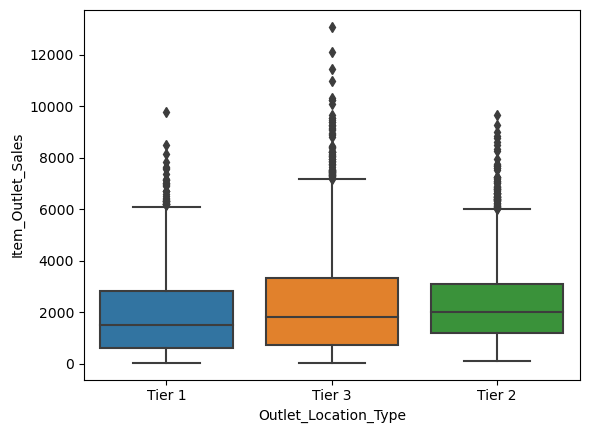

In [80]:
sns.boxplot(x = "Outlet_Location_Type", 
            y = "Item_Outlet_Sales", data = sales)

### Scaling

* Z score Transformation aka Standard Scaler
* Min Max Scaling aka Normalization

##### Why Scale??
Scaling is done to ensure that the **numerical** columns have the same scale and therefore, it becomes easy for any ML model to capture the pattern easily.

Note: For Encoding Multiple Ordinal Variables, one can use the Ordinal Encoder instead of Label Encoder.

Note: Standard Scaling is applicable on any kind of Data where as Minx Max Scaling is applicable on Image Datasets for example

In [81]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [82]:
localdf = sales.loc[:, ["Item_MRP", 
                        "Item_Weight", "Item_Visibility"]]

In [83]:
sc = StandardScaler() # Zscore Transformation
mmax = MinMaxScaler() # Normalization...

scaled_data = sc.fit_transform(localdf)

In [84]:
pd.DataFrame(scaled_data, columns = localdf.columns).mean()

Item_MRP          -1.644427e-16
Item_Weight        8.432849e-17
Item_Visibility   -8.548444e-17
dtype: float64

### Summary

* Exploratory Data Analysis - It is not any set of written instructions. It means that in a dataset, we have a problem somewhere and there is a target variable. We need to ensure that the features that are present in the data are congruent to the target.

* **Framework**

1. Understanding of Problem Statement and the Business...
2. Univariate Analysis
3. Bivariate Analysis :: Predictors vs Tgt.
4. Missing Values
5. Outliers Identification and removal if needed
6. Feature Engineering
7. Scaling and Encoding
8. Transformation
9. Train and Test Split (Optional)

In [85]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [86]:
# Define X and y
X = newsales.drop("Item_Outlet_Sales", axis = 1)
dummy_x = pd.get_dummies(X, drop_first = True)
y = newsales.Item_Outlet_Sales

In [87]:
xtrain, xtest, ytrain, ytest = train_test_split(dummy_x, y, 
                                                test_size = 0.20,
                                               random_state = 0)

In [88]:
print("xtrain: ", xtrain.shape)
print("ytrain: ", ytrain.shape)
print("xtest: ", xtest.shape)
print("ytest: ", ytest.shape)

xtrain:  (6818, 19)
ytrain:  (6818,)
xtest:  (1705, 19)
ytest:  (1705,)


In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rf = RandomForestRegressor()

In [93]:
model= rf.fit(xtrain, ytrain)

In [108]:
xtest.isnull().sum()

Item_Weight                      0
Item_Visibility                  0
Item_MRP                         0
Outlet_Establishment_Year        0
Price_Per_Unit                   1
Outlet_Vintage                   0
Outlet_Freq                      0
Item_Type_Freq                   0
outlet_tgt                       0
Item_Fat_Content_Regular         0
Outlet_Size_Medium               0
Outlet_Size_Small                0
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
Outlets_Good                     0
Outlets_Poor                     0
dtype: int64

In [109]:
xtest.loc[xtest.Price_Per_Unit.isnull(),"Price_Per_Unit"] = xtest.Price_Per_Unit.mean()

In [110]:
pred = model.predict(xtest)

In [111]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(ytest, pred))

1133.637800824663

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

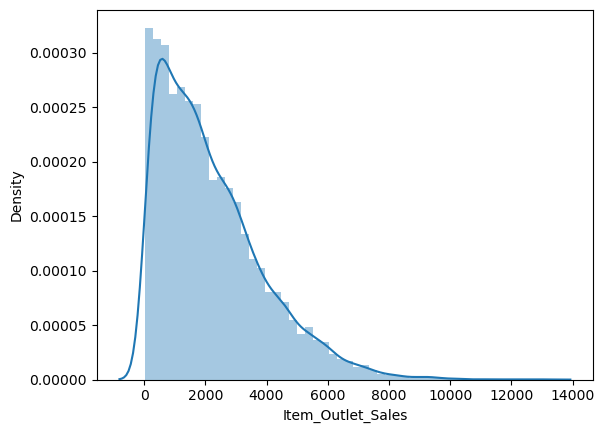

In [112]:
sns.distplot(newsales.Item_Outlet_Sales)

In [113]:
newsales.Item_Outlet_Sales.skew()

1.1775306028542796

In [114]:
np.log(newsales.Item_Outlet_Sales).skew()

-0.887753343209305

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

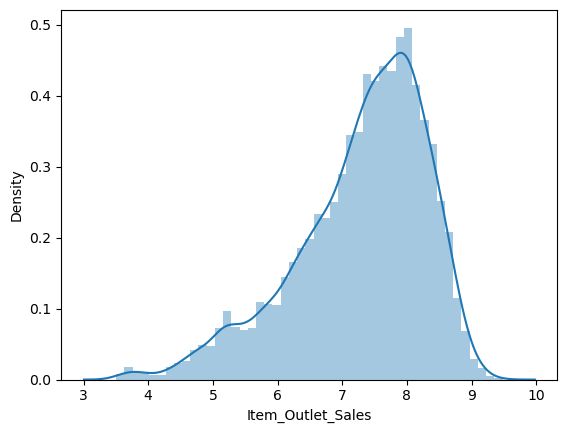

In [115]:
sns.distplot(np.log(newsales.Item_Outlet_Sales))

In [116]:
# Box Cox Transformation
# Convert the Non Normal Data into Normal Distribution
import scipy.stats as stats
stats.skew(stats.boxcox(newsales.Item_Outlet_Sales)[0])

-0.0749649223767276

<AxesSubplot:ylabel='Density'>

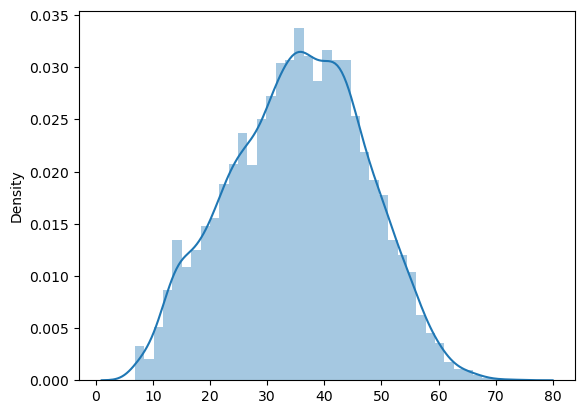

In [117]:
sns.distplot(stats.boxcox(newsales.Item_Outlet_Sales)[0])

In [118]:
# Yeo Johnson Transformation
# stats.boxcox(newsales.Item_Outlet_Sales)[0]

stats.skew(stats.yeojohnson(newsales.Item_Outlet_Sales)[0])

-0.07477744470274916

<AxesSubplot:ylabel='Density'>

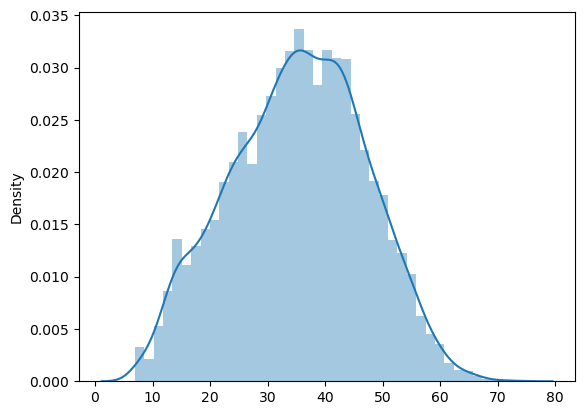

In [119]:
sns.distplot(stats.yeojohnson(newsales.Item_Outlet_Sales)[0])

#### Purpose of Transformation

* to reduce the skewness and at the same time, the machine is able to learn the pattern efficiently.

* the number of transformations are as follows : np.log, np.sqrt, np.inverse, stats.boxcox, stats.yeojohnson etc are some of the popular transformation names.

* Transformation is done in the end during the preprocessing stage.
* Remember that the transformation is done on Numerical variables only.

Feature Engineering>Missing Values>StandardScaler>Encoding>Transformation

Note: If the Data is Scaled, then we do not apply Transformation on the Scaled Features.

In [120]:
# Apply the Transformation

newsales.select_dtypes(include = np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Price_Per_Unit',
       'Outlet_Vintage', 'Outlet_Freq', 'Item_Type_Freq', 'outlet_tgt'],
      dtype='object')

In [121]:
num = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Outlet_Sales', 'Price_Per_Unit',
       'Outlet_Vintage']

In [122]:
# stats.yeojohnson(newsales.Item_Outlet_Sales)[0]

for i in num:
    newsales.loc[:, i] = stats.yeojohnson(newsales.loc[:, i])[0]

In [123]:
newsales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_Per_Unit,Outlets,Outlet_Vintage,Outlet_Freq,Item_Type_Freq,outlet_tgt
0,4.496780e+07,Low Fat,0.014866,65.573989,1999,Medium,Tier 1,Supermarket Type1,46.821722,2.061780e+11,Best,4.143071,930,682,1966.1074
1,1.547034e+06,Regular,0.017593,20.174741,2009,Medium,Tier 3,Supermarket Type2,20.917892,1.654767e+07,Good,2.059095,928,445,1655.1788
2,6.421819e+09,Low Fat,0.015475,43.818122,1999,Medium,Tier 1,Supermarket Type1,37.830713,1.563453e+07,Best,4.143071,930,425,1966.1074
3,1.352450e+10,Regular,-0.000000,52.404215,1998,NaN,Tier 3,Grocery Store,25.420371,5.225054e+07,Poor,4.287741,555,1232,250.3408
4,3.298348e+07,Low Fat,-0.000000,21.852361,1987,High,Tier 3,Supermarket Type1,28.577991,1.771409e+06,Good,5.567966,932,910,2050.6640


In [124]:
np.log([100, 50, 25, 1000])

array([4.60517019, 3.91202301, 3.21887582, 6.90775528])

In [125]:
np.exp([4.60517019, 3.91202301, 3.21887582, 6.90775528])

array([ 100.0000004 ,   50.00000023,   24.99999988, 1000.00000102])

#### Kurtosis

* In case of a normal distribution, if the skewness is between 0 to 0.5 and the Kurtosis is around 3, we can say that the data is normally distributed.

Note: Outliers in Normal Distribution - Any Data that lies beyond 3 sigma/zscore is considered an Outlier.

In [126]:
pd.DataFrame(stats.kurtosis(newsales.loc[:, num]), index = num)

,0
Item_Weight,NaN
Item_Visibility,-0.849612
Item_MRP,-0.876366
Item_Outlet_Sales,-0.539626
Price_Per_Unit,NaN
Outlet_Vintage,-1.118915
